In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных

<ol>
    <b>Параметры изображения:</b>
    <li><b>Размер изображения: </b>491 на 404 пикселей.</li>
    <li><b>Пересечение осей(начало координат): </b>(190, 230)</li>
    <li><b>Единица на оси X: </b>(285, 228)</li>
    <li><b>Единица на оси Y: </b>(192, 154)</li>
</ol>

<ul>
    <b>Масштаб по осям:</b>
    <li>Масштаб по X = 285 - 192 = 93 пикселей/единиц</li>
    <li>Масштаб по Y = 228 - 154 = 74 пикселей/единиц</li>
</ul>

<ul>
    <b>Формулы пересчета:</b>
    <li>x=($x_{pixel}$ - 190)/93</li>
    <li>y=(230 - $y_{pixel}$)/74</li>
</ul>

In [2]:
# Оцифрова синих точек
blue_start = np.array([
    [148, 295], [234, 296], [228, 260],
    [153, 226], [188, 193]
])

blue_start = pd.DataFrame(blue_start, columns=['x', 'y'])

# Оцифрова красных точек
red_start = np.array([
    [251, 185], [286, 189], [242, 155],
    [322, 153], [210, 82]
])

red_start = pd.DataFrame(red_start, columns=['x', 'y'])

In [3]:
print('Синие точки до пересчета:', blue_start, '\n', 'Красные точки до пересчета:', red_start, sep='\n')

Синие точки до пересчета:
     x    y
0  148  295
1  234  296
2  228  260
3  153  226
4  188  193


Красные точки до пересчета:
     x    y
0  251  185
1  286  189
2  242  155
3  322  153
4  210   82


In [4]:
trans_x = lambda x: (x - 190) / 93
trans_y = lambda y: (230 - y) / 74

blue = blue_start.copy()
blue['x'], blue['y'] = blue['x'].apply(trans_x), blue['y'].apply(trans_y)

red = red_start.copy()
red['x'], red['y'] = red['x'].apply(trans_x), red['y'].apply(trans_y)

In [5]:
print('Синие точки после пересчета:', blue, '\n', 'Красные точки после пересчета:', red, sep='\n')

Синие точки после пересчета:
          x         y
0 -0.451613 -0.878378
1  0.473118 -0.891892
2  0.408602 -0.405405
3 -0.397849  0.054054
4 -0.021505  0.500000


Красные точки после пересчета:
          x         y
0  0.655914  0.608108
1  1.032258  0.554054
2  0.559140  1.013514
3  1.419355  1.040541
4  0.215054  2.000000


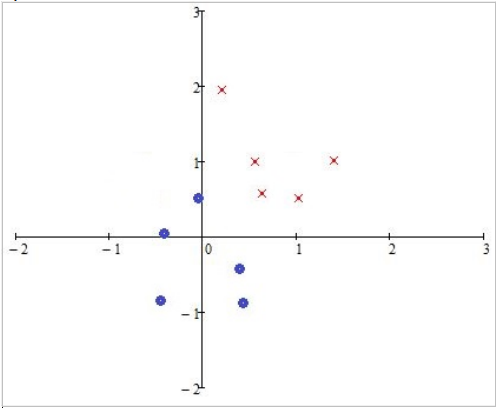

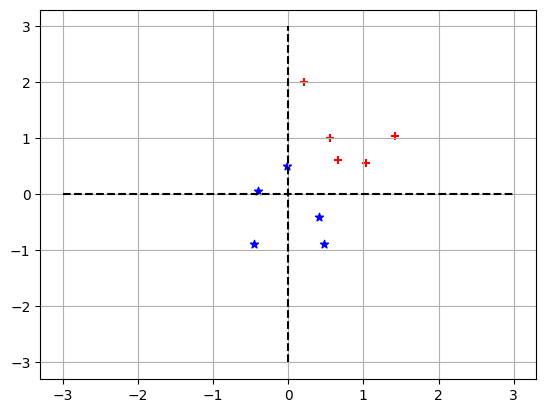

In [6]:
plt.scatter(blue['x'], blue['y'], marker='*', color='blue')
plt.scatter(red['x'], red['y'], marker='+', color='red')

plt.hlines(0, -3, 3, color='black', linestyles='--')
plt.vlines(0, -3, 3, color='black', linestyles='--')

plt.grid()
plt.show()

In [7]:
# добавим класс к данным, а также колонку для значения регрессии, колонку для метки и колонку для проверки правильности классификации
blue = pd.concat([
    pd.DataFrame(['-', '-', '-', '-', '-'], columns=['class']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['$x_0$']),
    blue.rename(columns={'x': '$x_1$', 'y': '$x_2$'}),
    pd.DataFrame([0.1, 0.1, 0.1, 0.1, 0.1], columns=['$w_0$']),
    pd.DataFrame([0.2, 0.2, 0.2, 0.2, 0.2], columns=['$w_1$']),
    pd.DataFrame([0.3, 0.3, 0.3, 0.3, 0.3], columns=['$w_2$']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['z']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['y']),
    pd.DataFrame(['+', '+', '+', '+', '+'], columns=['correct?']),
], axis=1)

red = pd.concat([
    pd.DataFrame(['+', '+', '+', '+', '+'], columns=['class']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['$x_0$']),
    red.rename(columns={'x': '$x_1$', 'y': '$x_2$'}),
    pd.DataFrame([0.1, 0.1, 0.1, 0.1, 0.1], columns=['$w_0$']),
    pd.DataFrame([0.2, 0.2, 0.2, 0.2, 0.2], columns=['$w_1$']),
    pd.DataFrame([0.3, 0.3, 0.3, 0.3, 0.3], columns=['$w_2$']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['z']),
    pd.DataFrame([1.0, 1.0, 1.0, 1.0, 1.0], columns=['y']),
    pd.DataFrame(['+', '+', '+', '+', '+'], columns=['correct?'])
], axis=1)

all_data = pd.concat([blue, red], axis=0).reset_index().drop(['index'], axis=1)

In [8]:
all_data

,class,$x_0$,$x_1$,$x_2$,$w_0$,$w_1$,$w_2$,z,y,correct?
0,-,1.0,-0.451613,-0.878378,0.1,0.2,0.3,1.0,1.0,+
1,-,1.0,0.473118,-0.891892,0.1,0.2,0.3,1.0,1.0,+
2,-,1.0,0.408602,-0.405405,0.1,0.2,0.3,1.0,1.0,+
3,-,1.0,-0.397849,0.054054,0.1,0.2,0.3,1.0,1.0,+
4,-,1.0,-0.021505,0.500000,0.1,0.2,0.3,1.0,1.0,+
5,+,1.0,0.655914,0.608108,0.1,0.2,0.3,1.0,1.0,+
6,+,1.0,1.032258,0.554054,0.1,0.2,0.3,1.0,1.0,+
7,+,1.0,0.559140,1.013514,0.1,0.2,0.3,1.0,1.0,+
8,+,1.0,1.419355,1.040541,0.1,0.2,0.3,1.0,1.0,+
9,+,1.0,0.215054,2.000000,0.1,0.2,0.3,1.0,1.0,+


# Обучение

In [9]:
data = all_data.copy()

In [10]:
# Инициализация весов
def initialize_weights(data):
    return np.array([
        data.loc[0, '$w_0$'],
        data.loc[0, '$w_1$'],
        data.loc[0, '$w_2$']
    ])

# Функции для вычислений
z = lambda x, w: np.dot(x, w)
rule = lambda z: int(z >= 0)

# Параметры обучения
max_epochs = 10
converged = False
epoch = 0

# Подготовка данных
original_index = data.index
all_epochs_data = []

# Начальные веса
prev_weights = initialize_weights(data)

while epoch < max_epochs and not converged:
    converged = True
    change_weights = np.array([0.0, 0.0, 0.0])
    epoch += 1
    
    for idx in data.index:
        row = data.loc[idx]
        
        # Применяем изменения весов от предыдущего примера
        if np.any(change_weights != 0):
            prev_weights += change_weights
            change_weights = np.array([0.0, 0.0, 0.0])
        
        # Записываем текущие веса
        current_weights = prev_weights.copy()
        
        # Вычисляем выход
        x = np.array([row['$x_0$'], row['$x_1$'], row['$x_2$']])
        target = 1.0 if row['class'] == '+' else 0.0
        
        z_out = z(x, current_weights)
        y_out = rule(z_out)
        is_correct = (y_out == target)
        
        # Обновление данных
        new_row = {
            'epoch': epoch,
            '$x_0$': row['$x_0$'],
            '$x_1$': row['$x_1$'],
            '$x_2$': row['$x_2$'],
            '$w_0$': current_weights[0],
            '$w_1$': current_weights[1],
            '$w_2$': current_weights[2],
            'z': z_out,
            'y': y_out,
            'correct?': '+' if is_correct else '-',
            'class': row['class']
        }
        all_epochs_data.append(new_row)
        
        # Обновляем веса при ошибке
        if not is_correct:
            converged = False  # Есть ошибка - продолжаем обучение
            delta = target - y_out
            change_weights = delta * x
    
    # Применяем последнее изменение весов для перехода к следующей эпохе
    if np.any(change_weights != 0):
        prev_weights += change_weights

    if converged:
        print(f"Converged after {epoch} epochs")
        break

# Создаем объединенный DataFrame
full_data = pd.DataFrame(all_epochs_data)

full_data

Converged after 4 epochs


,epoch,$x_0$,$x_1$,$x_2$,$w_0$,$w_1$,$w_2$,z,y,correct?,class
0,1,1.0,-0.451613,-0.878378,0.1,0.200000,0.300000,-0.253836,0,+,-
1,1,1.0,0.473118,-0.891892,0.1,0.200000,0.300000,-0.072944,0,+,-
2,1,1.0,0.408602,-0.405405,0.1,0.200000,0.300000,0.060099,1,-,-
3,1,1.0,-0.397849,0.054054,-0.9,-0.208602,0.705405,-0.778878,0,+,-
4,1,1.0,-0.021505,0.500000,-0.9,-0.208602,0.705405,-0.542811,0,+,-
5,1,1.0,0.655914,0.608108,-0.9,-0.208602,0.705405,-0.607862,0,-,+
6,1,1.0,1.032258,0.554054,0.1,0.447312,1.313514,1.289499,1,+,+
7,1,1.0,0.559140,1.013514,0.1,0.447312,1.313514,1.681374,1,+,+
8,1,1.0,1.419355,1.040541,0.1,0.447312,1.313514,2.101658,1,+,+
9,1,1.0,0.215054,2.000000,0.1,0.447312,1.313514,2.823223,1,+,+


In [11]:
full_data.to_excel('perceptron_res.xlsx', index=False)

<b>Уравнение разделяющей прямой для двумерного пространства: </b><br>
$z = w_0 + w_1 * x_1 + w_2 * x_2 = 0$<br>
$x_2 = \frac{-w_0 - w_1 * x_1}{w_2}$

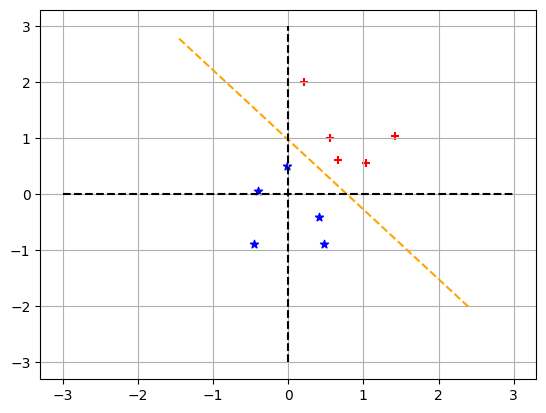

In [12]:
trans_x = lambda x: (x - 190) / 93
trans_y = lambda y: (230 - y) / 74

blue = blue_start.copy()
blue['x'], blue['y'] = blue['x'].apply(trans_x), blue['y'].apply(trans_y)

red = red_start.copy()
red['x'], red['y'] = red['x'].apply(trans_x), red['y'].apply(trans_y)

# Генерируем линию разделения
w0 = current_weights[0]
w1 = current_weights[1]
w2 = current_weights[2]

x1_min, x1_max = data['$x_1$'].min()-1, data['$x_1$'].max()+1
x1_values = np.linspace(x1_min, x1_max, 100)

if w2 != 0:
    # Уравнение: w0*1 + w1*x1 + w2*x2 = 0 → x2 = (-w0 - w1*x1)/w2
    x2_values = (-w0 - w1*x1_values) / w2
    plt.plot(x1_values, x2_values, color='orange', linestyle='--')
elif w1 != 0:
    # Вертикальная линия x1 = -w0/w1
    x1_const = -w0/w1
    plt.axvline(x=x1_const, color='orange', linestyle='--')
else:
    print('Все веса нулевые, разделение невозможно')

plt.scatter(blue['x'], blue['y'], marker='*', color='blue')
plt.scatter(red['x'], red['y'], marker='+', color='red')

plt.hlines(0, -3, 3, color='black', linestyles='--')
plt.vlines(0, -3, 3, color='black', linestyles='--')

plt.grid()
plt.show()